# I. 데이터 탐색

## 1. 탐색적 데이터분석(EDA)

> 데이터 분석 진행 전 전반적인 사전 탐색을 진행

- 개별 데이터 관찰
    - 데이터의 앞/뒤 부분 관찰, 무작위 표본 추출
    - 분석목적과 변수 파악

- 데이터 문제성 확인
    - 결측치와 이상치 유무 확인
    - 결측치와 이상치의 발생 의미 파악
    - 결측치와 이상치 대처 방안(제거, 대체, 유지) 파악
    - 결측치 대치 방법 : 단순대치법, 다중유지법
    - 이상치 대치 방법 : 제거, 대체, 유지
    - 결측치 발견방법 : 개별 데이터 관찰, 관련 함수 사용, 상관관계 활용
    - 이상치 발견방법 : 개별 데이터 관찰, 통계값 활용, 시각화 활용, 머신러닝 기법 활용

- 데이터의 개별 속성값 분포 확인
    - 데이터의 중심 : 평균(mean), 중앙값(median), 최빈값(mode)
    - 데이터의 분산 : 범위(range), 분산(variance), 표준편차(standard deviation)
    - 사분위 범위(IQR) 방법 사용
    - 시각화를 통해 데이터의 개별 속성 파악(확률밀도 함수, 히스토그램, 박스플롯, 산점도, 워드클라우드, 시계열차트, 지도 등)

- 데이터 속성간 관계 파악
    - 상관관계 분석을 통해 두 변수 간 선형적관계 여부 파악
    - 선형적 관계가 없으면 독립적인 관계, 관계가 존재하면 상관된 관계

## 2. 데이터 탐색

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')  # 타이타닉 data

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df.info()  # 변수타입 등 확인 위함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df['Survived'] = df['Survived'].astype(str)
df['Pclass'] = df['Pclass'].astype(str)
# 숫자형 변수로 되어 있으나 범주의 의미를 가진 숫자이므로 str로 변환

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.info()  # non-null값 확인하여 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [33]:
df.describe(include = 'all')  # 기술통계, top : 최빈값, freq : 최빈값 갯수

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [34]:
grouped = df.groupby('Pclass')  # Pclass 별로 그룹핑
grouped.size()

Pclass
1    216
2    184
3    491
dtype: int64

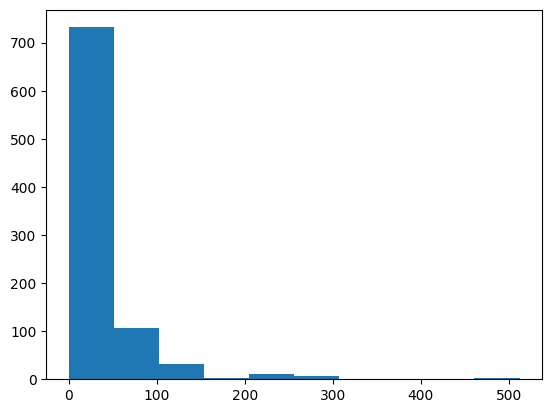

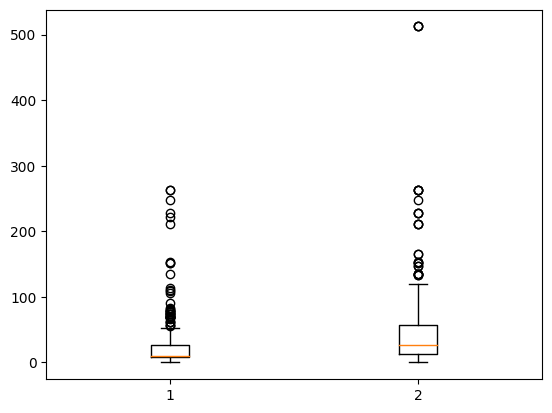

In [38]:
plt.hist(df['Fare'])
plt.show()  # 요금 순으로 histogram

data_0 = df[df['Survived'] == "0"]['Fare']
data_1 = df[df['Survived'] == "1"]['Fare']

fig, ax = plt.subplots()  # figure(그림의 전체적 속성), axe(실제 데이터를 시각화하는 부분) 두 객체를 반환
ax.boxplot([data_0, data_1])  # data_0, data_1로 박스플롯을 생성해 시각화, plt.boxplot()에 비해 세밀한 제어가 가능하며 다중 plot에 유리
plt.show()

In [44]:
grouped = df.groupby('Sex')
print(grouped.size())
print('')

data_0 = df[df['Sex'] == 'female']['Survived']  # Sex컬럼 female로 필터링 후 Survived컬럼 필터링
grouped = pd.DataFrame(data_0).groupby("Survived")  # dataframe으로 생성 후 Survived별로 그룹화
print(grouped.size())
print('')

data_1 = df[df['Sex'] == 'male']['Survived']
grouped = pd.DataFrame(data_1).groupby('Survived')
print(grouped.size())

Sex
female    314
male      577
dtype: int64

Survived
0     81
1    233
dtype: int64

Survived
0    468
1    109
dtype: int64


# II. 데이터 전처리 개요

## 1. 데이터 전처리 유형

- 결측치 처리
    - 결측치가 포함되어 있는 항목을 모두 버림
    - 결측치를 적절한 값으로 대체
    - 결측치를 NaN으로 표시하여 다음의 분석단계로 결측치 처리를 넘김

- 틀린(Invalid)값 처리(결측치와 달리 틀린값은 바로 발견하기 어려움)
    - 틀린 값이 포함된 항목을 모두 버림
    - 틀린 값을 적절한 값으로 대체
    - 분석 단계로 틀린 값 처리를 넘김

- 이상치(outlier) 처리
    - 이상치 검출(detection)

- 데이터 변환
    - 분석하기 좋은 형태로 바꾸는 것
    - 범주형으로 변환 : *e.g.* 출생년도 데이터를 10대, 20대.. 로 정규화
    - 일반 정규화 : 각 수치의 범위가 다를때 같은 범위로 변환
    - Z-score 정규화 : 표준편차를 고려해 데이터 변환. 평균 0, 표준편차 1로 환산

- 로그(log) 변환
    - 값의 범위가 너무 큰 경우나 숫자의 증가를 덧셈이 아닌 곱셈으로 처리하는 것이 편리한 경우 등
    - 로그를 취하면 정규분포에 가깝게 변환되는 경우; 로그 정규분포를 가진다

- 역수 변환
    - 역수를 사용하면 오히려 선형적인 특성을 가지게 되어 의미를 해석하기 쉬워지는 경우

- 데이터 축소(reduction)
    -  같은 정보량을 가지면서 데이터의 크기를 줄이는 것
    - 기존 데이터의 특징들을 대표하는 새로운 값을 추출하는 것 : PCA

- 샘플링
    - 전체 데이터 중에서 분석에 필요한 데이터를 취하는 것
    - 샘플링된 데이터가 전체 데이터의 특징을 계속 유지할 수 있도록 샘플링 해야

- 훈련 데이터와 테스트 데이터
    - 모델을 만드는 과정(훈련, training), 성능을 검증하는 것(테스트, test)
    - 각 데이터를 준비할 때 랜덤한 성질을 보정하는 것이 필요

## 2. 데이터 변환

In [45]:
import numpy as np
import pandas as pd

In [ ]:
meat_consumption_korean = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4 * np.random.randn(1000) + 32.7

In [ ]:
meat_consumption = pd.DataFrame({'한국인' : meat_consumption_korean, '일본인' : meat_consumption_japan})
meat_consumption

,한국인,일본인
0,55.874533,40.736771
1,61.993861,32.954360
2,50.154839,32.875339
3,51.430760,39.057109
4,57.190901,35.096401
...,...,...
995,49.081273,34.467634
996,48.517008,31.780624
997,49.411309,35.883697
998,56.122507,28.453749


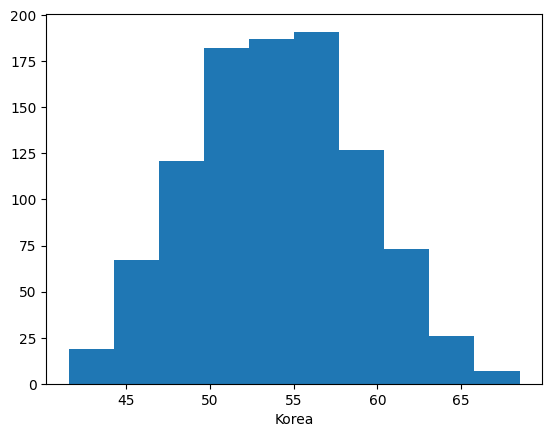

In [ ]:
plt.hist(meat_consumption_korean)
plt.xlabel('Korea')
plt.show()

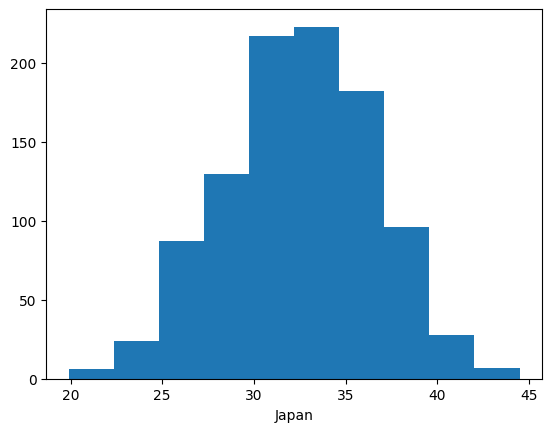

In [ ]:
plt.hist(meat_consumption_japan)
plt.xlabel('Japan')
plt.show()

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/df_sample.csv")

In [ ]:
mid_avg = np.mean(df1['중간'])
mid_std = np.std(df1['중간'])
df1['중간_Z점수'] = (df1['중간'] - mid_avg) / mid_std

df1.head()

,학번,중간,기말,리포트,퀴즈,중간_Z점수
0,S01,90,95,20,20,1.231167
1,S02,82,83,18,18,0.436866
2,S03,80,78,18,18,0.238290
3,S04,78,75,10,10,0.039715
4,S05,93,91,12,12,1.529030


In [ ]:
import scipy.stats as ss

meat_consumption['한국인_정규화'] = ss.zscore(meat_consumption_korean)
meat_consumption['일본인_정규화'] = ss.zscore(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,55.874533,40.736771,0.407344,2.060544
1,61.993861,32.954360,1.605945,0.062549
2,50.154839,32.875339,-0.712981,0.042261
3,51.430760,39.057109,-0.463064,1.629321
4,57.190901,35.096401,0.665183,0.612479


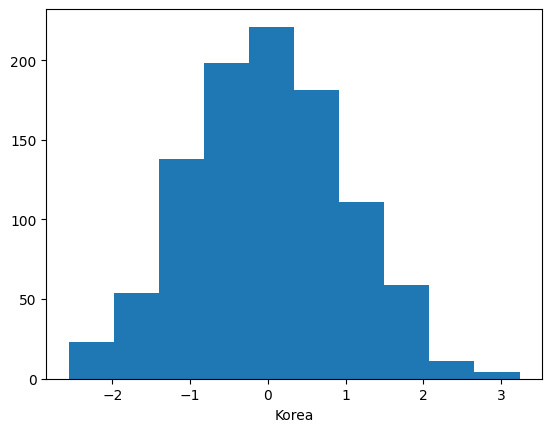

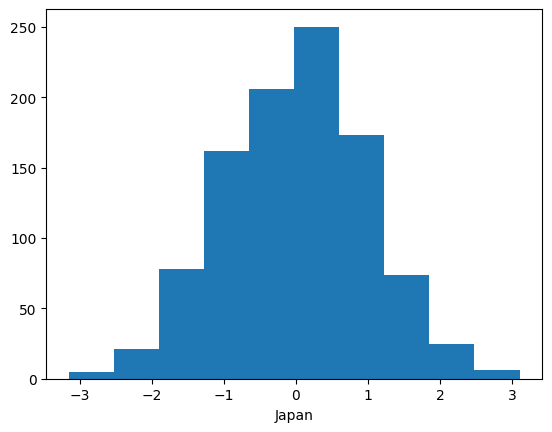

In [ ]:
plt.hist(meat_consumption['한국인_정규화'])
plt.xlabel('Korea')
plt.show()

plt.hist(meat_consumption['일본인_정규화'])
plt.xlabel('Japan')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption['한국인_정규화3'] = scaler.fit_transform(meat_consumption[['한국인']])

scaler = StandardScaler()
meat_consumption['일본인_정규화3'] = scaler.fit_transform(meat_consumption[['일본인']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption['한국인_mm'] = scaler.fit_transform(meat_consumption[['한국인']])

scaler = MinMaxScaler()
meat_consumption['일본인_mm'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption[['한국인', '일본인', '한국인_mm', '일본인_mm']]

,한국인,일본인,한국인_mm,일본인_mm
0,55.874533,40.736771,0.512211,0.833368
1,61.993861,32.954360,0.718861,0.514024
2,50.154839,32.875339,0.319058,0.510781
3,51.430760,39.057109,0.362145,0.764444
4,57.190901,35.096401,0.556665,0.601920
...,...,...,...,...
995,49.081273,34.467634,0.282803,0.576120
996,48.517008,31.780624,0.263748,0.465861
997,49.411309,35.883697,0.293949,0.634226
998,56.122507,28.453749,0.520585,0.329346


In [ ]:
meat_consumption

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화3,일본인_정규화3,한국인_mm,일본인_mm
0,55.874533,40.736771,0.407344,2.060544,0.407344,2.060544,0.512211,0.833368
1,61.993861,32.954360,1.605945,0.062549,1.605945,0.062549,0.718861,0.514024
2,50.154839,32.875339,-0.712981,0.042261,-0.712981,0.042261,0.319058,0.510781
3,51.430760,39.057109,-0.463064,1.629321,-0.463064,1.629321,0.362145,0.764444
4,57.190901,35.096401,0.665183,0.612479,0.665183,0.612479,0.556665,0.601920
...,...,...,...,...,...,...,...,...
995,49.081273,34.467634,-0.923262,0.451055,-0.923262,0.451055,0.282803,0.576120
996,48.517008,31.780624,-1.033785,-0.238787,-1.033785,-0.238787,0.263748,0.465861
997,49.411309,35.883697,-0.858617,0.814604,-0.858617,0.814604,0.293949,0.634226
998,56.122507,28.453749,0.455915,-1.092903,0.455915,-1.092903,0.520585,0.329346


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/USJudgeRatings.csv')
df.head(5)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [ ]:
import scipy.stats as ss

print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


In [ ]:
df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


73.5


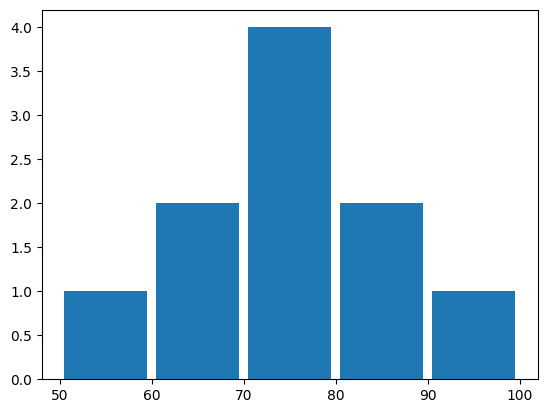

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [2]:
data = [['철수', 52], ['영희', 92], ['미영', 84], ['시완', 71], ['미경', 65], ['영환', 81], ['숙경', 66], ['부영', 77], ['민섭', 73], ['보연', 74]]
df = pd.DataFrame(data, columns = ['이름', '수학점수'])

print(np.mean(df['수학점수']))

plt.hist(df['수학점수'], bins = 5, range = [50, 100], rwidth = 0.9)
plt.show()
df

In [8]:
df['등급'] = 0

df.loc[(df['수학점수']<60), '등급'] = 'F'
df.loc[(df['수학점수']>=60) & (df['수학점수']<70), '등급'] = 'D'
df.loc[(df['수학점수']>=70) & (df['수학점수']<80), '등급'] = 'C'
df.loc[(df['수학점수']>=80) & (df['수학점수']<90), '등급'] = 'B'
df.loc[(df['수학점수']>=90) & (df['수학점수']<100), '등급'] = 'A'
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [11]:
pd.cut(x = df['수학점수'],
       bins = [0, 60, 70, 80, 90, 100],
       labels = ['F', 'D', 'C', 'B', 'A'],
       include_lowest = True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [12]:
df['등급_qcut'] = pd.qcut(x=df['수학점수'], q=5, labels = ['F', 'D', 'C', 'B', 'A'],)
df

,이름,수학점수,등급,등급_qcut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,A
3,시완,71,C,D
4,미경,65,D,F
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C
9,보연,74,C,C


## 3. 차원 축소(PCA)

In [13]:
iris = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv')

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df = iris.drop(['species'], axis = 1)  # 1이 세로 모양이니 세로축으로 기억
df_species = iris['species']

df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
from sklearn.preprocessing import StandardScaler

df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df['sepal_width'] = StandardScaler().fit_transform(df[['sepal_width']])
df['petal_length'] = StandardScaler().fit_transform(df[['petal_length']])
df['petal_width'] = StandardScaler().fit_transform(df[['petal_width']])

from sklearn.decomposition import PCA
pca = PCA(n_components=4)  # components 4개짜리 PCA칸을 만들어 pca 변수에 저장
p_score = pca.fit_transform(df)  # 만든 칸에 위에서 변환한 df를 넣음
print(p_score.shape)
print(pca.explained_variance_ratio_)  # 4개 요소 각각의 기여도(앞의 2개 요소만으로 96%의 변동성을 설명가능하므로 변수 2개로 줄일수 있음)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


## 4. 결측치 처리

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')
df.isnull()  # cell 별로 결측치 여부를 확인, True(결측치 있음)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
print(df.isnull().sum())  # cell수가 많은 경우 null 갯수 합계

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [49]:
df.info()  # Non-Null Count에서도 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
df_1 = df.dropna(axis = 0)  # 결측치가 있는 모든 행 삭제

print(df_1.isnull().sum().sum())  # sum() 1회 사용 시 컬럼 별 갯수 반환, 2회 사용 시 전체 갯수 반환
df_1.shape

0


(183, 12)

In [54]:
print(df['Age'].isnull().sum())  # age컬럼의 결측치 갯수
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace = True)  # 결측치를 평균값으로 대체
print(df['Age'].isnull().sum())

177
0


In [55]:
from scipy.stats import mode  # scipy의 최빈값 함수 사용

print(df['Embarked'].isnull().sum())  # embarked 컬럼의 결측치 갯수
embarked_mode = df['Embarked'].mode()  # 최빈값 embarked_mode 변수에 저장

df['Embarked'].fillna(embarked_mode[0], inplace = True)  # 결측치를 최빈값으로 대체
print(df['Embarked'].isnull().sum())

2
0


In [60]:
df['Embarked'].fillna(method = 'ffill', inplace = True)  # ffil : 결측치를 직전행의 값으로 대체, bfil : 결측치를 다음행의 값으로 대체

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')

print(df.groupby('Sex')['Age'].mean())  # 성별로 그룹화 한 뒤 나이의 평균
print()
print(df.groupby('Pclass')['Age'].mean())  # Pclass로 그룹화 한 뒤 나이의 평균

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [65]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace = True)  # inplace = True : 변경된 내용을 원래 dataframe에 적용

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q


## 5. 이상치(outlier) 처리

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
data = 10 * np.random.randn(200) + 50  # 평균50, 표준편차 10을 가지는 데이터 200개 생성
df = pd.DataFrame({'값' : data})

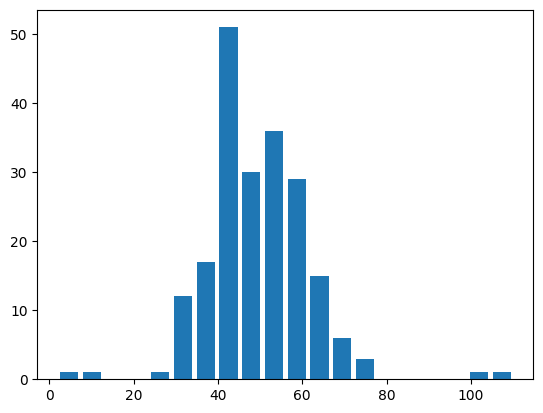

In [67]:
# 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

plt.hist(df['값'], bins = 20, rwidth = 0.8)
plt.show()

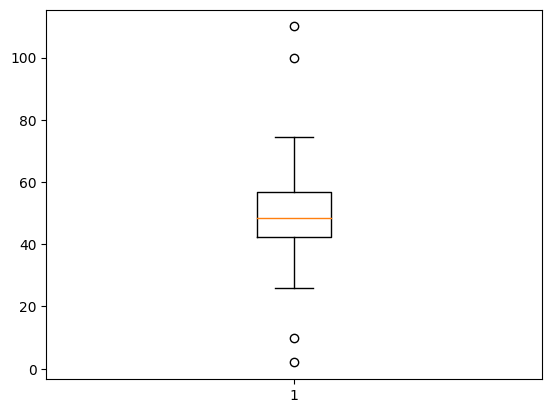

In [68]:
plt.boxplot(df['값'])
plt.show()